# EXPLORATIVE DATA ANALYSIS OF HEART DATA SET

# IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,OrdinalEncoder


# Read data set heart

In [3]:
heart_df=pd.read_csv(r"C:\Users\GCE PMNA\Downloads\heart.csv")

In [4]:
heart_df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


# Show columns,info,describe

In [5]:
heart_df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [6]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [7]:
heart_df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [8]:
heart_df.describe(include='all')

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918,918,918.000000,918.000000,918.000000,918,918.000000,918,918.000000,918,918.000000
unique,NaN,2,4,NaN,NaN,NaN,3,NaN,2,NaN,3,NaN
top,NaN,M,ASY,NaN,NaN,NaN,Normal,NaN,N,NaN,Flat,NaN
freq,NaN,725,496,NaN,NaN,NaN,552,NaN,547,NaN,460,NaN
mean,53.510893,NaN,NaN,132.396514,198.799564,0.233115,NaN,136.809368,NaN,0.887364,NaN,0.553377
std,9.432617,NaN,NaN,18.514154,109.384145,0.423046,NaN,25.460334,NaN,1.066570,NaN,0.497414
min,28.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN,60.000000,NaN,-2.600000,NaN,0.000000
25%,47.000000,NaN,NaN,120.000000,173.250000,0.000000,NaN,120.000000,NaN,0.000000,NaN,0.000000
50%,54.000000,NaN,NaN,130.000000,223.000000,0.000000,NaN,138.000000,NaN,0.600000,NaN,1.000000
75%,60.000000,NaN,NaN,140.000000,267.000000,0.000000,NaN,156.000000,NaN,1.500000,NaN,1.000000


# MISSING VALUE HANDLING

In [9]:
# show unique value and data types of each column

In [10]:
for i in heart_df.columns:
    print(i ,' :- ')
    print(heart_df[i].unique())

Age  :- 
[40 49 37 48 54 39 45 58 42 38 43 60 36 44 53 52 51 56 41 32 65 35 59 50
 47 31 46 57 55 63 66 34 33 61 29 62 28 30 74 68 72 64 69 67 73 70 77 75
 76 71]
Sex  :- 
['M' 'F']
ChestPainType  :- 
['ATA' 'NAP' 'ASY' 'TA']
RestingBP  :- 
[140 160 130 138 150 120 110 136 115 100 124 113 125 145 112 132 118 170
 142 190 135 180 108 155 128 106  92 200 122  98 105 133  95  80 137 185
 165 126 152 116   0 144 154 134 104 139 131 141 178 146 158 123 102  96
 143 172 156 114 127 101 174  94 148 117 192 129 164]
Cholesterol  :- 
[289 180 283 214 195 339 237 208 207 284 211 164 204 234 273 196 201 248
 267 223 184 288 215 209 260 468 188 518 167 224 172 186 254 306 250 177
 227 230 294 264 259 175 318 216 340 233 205 245 194 270 213 365 342 253
 277 202 297 225 246 412 265 182 218 268 163 529 100 206 238 139 263 291
 229 307 210 329 147  85 269 275 179 392 466 129 241 255 276 282 338 160
 156 272 240 393 161 228 292 388 166 247 331 341 243 279 198 249 168 603
 159 190 185 290 212 231 222 23

In [11]:
heart_df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [12]:
col=['RestingBP','Cholesterol','Oldpeak']
for i in col:
    col_median=heart_df[i].median()
    heart_df[i]=heart_df[i].replace(0,col_median)

In [13]:
for i in heart_df.columns:
    print(i ,' :- ')
    print(heart_df[i].unique())

Age  :- 
[40 49 37 48 54 39 45 58 42 38 43 60 36 44 53 52 51 56 41 32 65 35 59 50
 47 31 46 57 55 63 66 34 33 61 29 62 28 30 74 68 72 64 69 67 73 70 77 75
 76 71]
Sex  :- 
['M' 'F']
ChestPainType  :- 
['ATA' 'NAP' 'ASY' 'TA']
RestingBP  :- 
[140 160 130 138 150 120 110 136 115 100 124 113 125 145 112 132 118 170
 142 190 135 180 108 155 128 106  92 200 122  98 105 133  95  80 137 185
 165 126 152 116 144 154 134 104 139 131 141 178 146 158 123 102  96 143
 172 156 114 127 101 174  94 148 117 192 129 164]
Cholesterol  :- 
[289 180 283 214 195 339 237 208 207 284 211 164 204 234 273 196 201 248
 267 223 184 288 215 209 260 468 188 518 167 224 172 186 254 306 250 177
 227 230 294 264 259 175 318 216 340 233 205 245 194 270 213 365 342 253
 277 202 297 225 246 412 265 182 218 268 163 529 100 206 238 139 263 291
 229 307 210 329 147  85 269 275 179 392 466 129 241 255 276 282 338 160
 156 272 240 393 161 228 292 388 166 247 331 341 243 279 198 249 168 603
 159 190 185 290 212 231 222 235 32

# Grouping

In [14]:
heart_df.groupby('Sex')[['RestingBP','Cholesterol','FastingBS','MaxHR','Oldpeak']].mean()

,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak
Sex,,,,,
F,132.212435,253.906736,0.134715,146.139896,0.973575
M,132.624828,237.034483,0.259310,134.325517,1.168966


Females have higher cholesterol and higher maximum heart rate than males.

Males show almost double high blood sugar levels (FastingBS) compared to females.

Males also have higher Oldpeak, indicating more stress-induced ST depression → potential heart disease risk.

In [15]:
heart_df.groupby('ChestPainType')[['RestingBP','Cholesterol','FastingBS','MaxHR','Oldpeak','Age']].mean()

,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Age
ChestPainType,,,,,,
ASY,133.229839,243.294355,0.284274,128.477823,1.329637,54.959677
ATA,130.624277,242.069364,0.109827,150.208092,0.730636,49.242775
NAP,131.600985,234.788177,0.201970,143.236453,0.955665,53.310345
TA,136.413043,231.304348,0.282609,147.891304,1.206522,54.826087


ASY patients have the highest Oldpeak and lowest MaxHR → highest risk group.

ATA patients are younger with better heart performance (high MaxHR & low Oldpeak).

TA has the highest RestingBP → possible hypertension.

# DATA VIAUAlISATION
## Univariate,BiVariate and MultiVariate Analysis

### Univariate Analysis plot

#### DISTPLOT

C:\Users\GCE PMNA\AppData\Local\Temp\ipykernel_9912\272079808.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(heart_df['Age'],kde=True,bins=10,color='Red')


<Axes: xlabel='Age', ylabel='Density'>

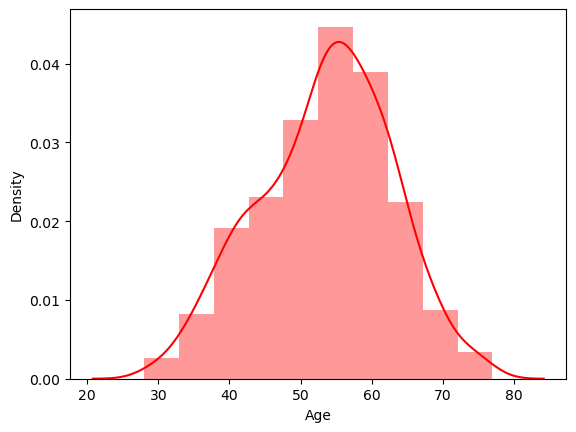

In [16]:
sns.distplot(heart_df['Age'],kde=True,bins=10,color='Red')

#### COUNTPLOT

📌 What it shows

Distribution of patient ages

📊 Insights

Most patients are between 45–60 years

Few younger (<35) and older (>75) individuals

✅ Heart disease mostly affects middle-aged to older adults.

<Axes: xlabel='HeartDisease', ylabel='count'>

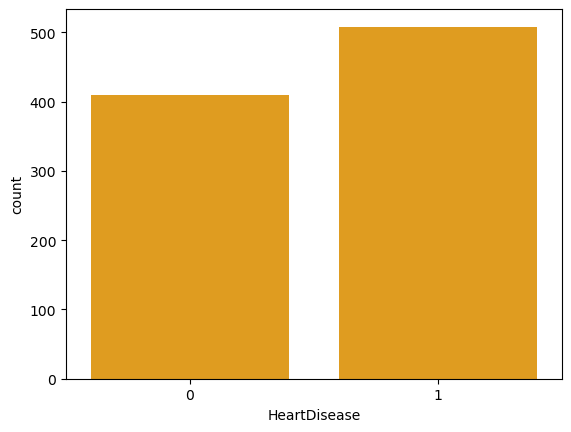

In [17]:
sns.countplot(x='HeartDisease',data=heart_df,color='orange')

📌 What it shows

Number of patients with and without heart disease

📊 Insights

More patients have heart disease (1) than not (0)

Dataset is slightly imbalanced → important for machine learning

✅ Need to consider balancing techniques (SMOTE etc.)

#### PIEPLOT

([<matplotlib.patches.Wedge at 0x220b8d7dbe0>,
 [Text(-1.091193546885493, -0.13891235810919703, 'ASY'),
  Text(0.893445557267097, -0.6416814133194811, 'NAP'),
  Text(0.8663480674505954, 0.6778207919683629, 'ATA'),
  Text(0.1724495733492309, 1.0863982440392972, 'TA')],
 [Text(-0.5951964801193597, -0.0757703771504711, '54.0%1'),
  Text(0.4873339403275073, -0.35000804362880783, '22.1%1'),
  Text(0.4725534913366884, 0.36972043198274335, '18.8%1'),
  Text(0.09406340364503502, 0.5925808603850711, '5.0%1')])

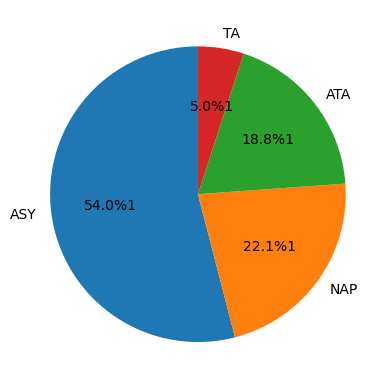

In [18]:
h_pie=heart_df['ChestPainType'].value_counts()
plt.pie(h_pie,labels=h_pie.index,autopct='%1.1f%%1',startangle=90)


📌 What it shows

Proportion of chest pain types (ASY, NAP, ATA, TA)

📊 Insights

ASY (Asymptomatic) is the highest (~54%)

TA is the least common

✅ Many patients have hidden symptoms, indicating silent heart issues.

#### KDE PLOT

C:\Users\GCE PMNA\AppData\Local\Temp\ipykernel_9912\3544738436.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=heart_df, x='Age', hue='HeartDisease', shade=True)


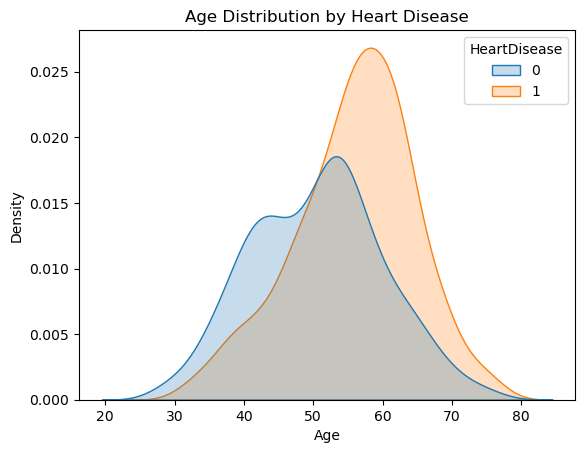

In [19]:
sns.kdeplot(data=heart_df, x='Age', hue='HeartDisease', shade=True)
plt.title("Age Distribution by Heart Disease")
plt.show()

📌 What it shows

Age density curve for:

0 = No heart disease

1 = Heart disease

📊 Insights

Non-disease group peaks near 48–52 years

Disease group peaks near 55–60 years

Heart disease is more common in older patients

✅ Age plays an important role in predicting disease.

#### BIVARIATE plots

#### Barplot

<Axes: xlabel='Sex', ylabel='HeartDisease'>

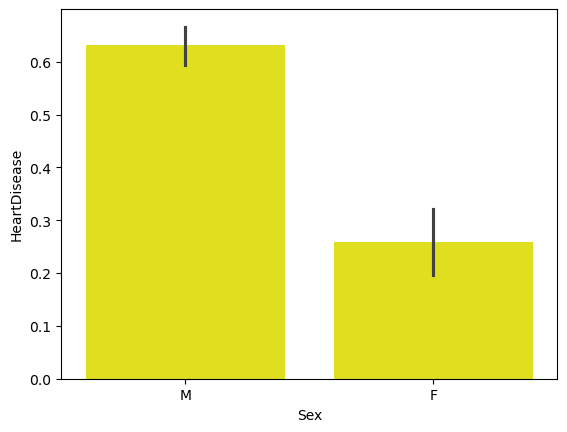

In [20]:
sns.barplot(x='Sex',y='HeartDisease',data=heart_df,color='yellow')

#### Jointplot

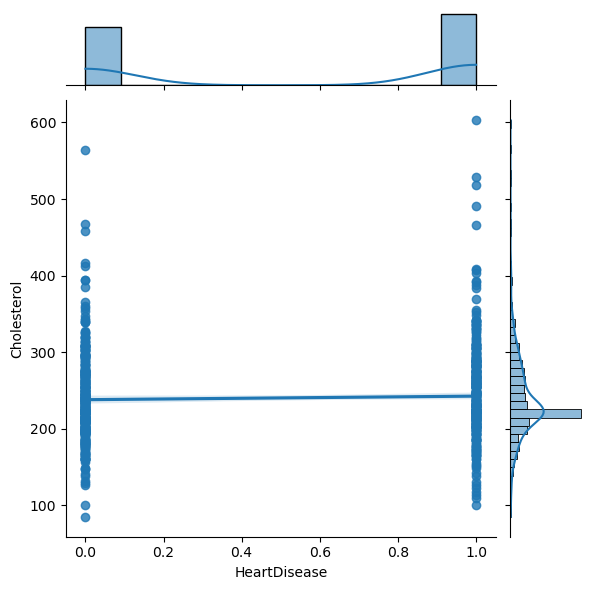

In [26]:
sns.jointplot(x='HeartDisease',y='Cholesterol',data=heart_df,kind='reg')

Cholesterol levels show large variation among both heart disease and non-heart disease patients, indicating that cholesterol by itself is not a strong distinguishing factor in this dataset.

#### MULTIVARIATE PLOTS

#### Boxplot

In [ ]:
sns.boxplot(x='ST_Slope',y='Age',data=heart_df,hue='HeartDisease',color='yellow')

📌 What it shows

X-axis: ST Slope types → Up, Flat, Down

Y-axis: Age

Colors represent HeartDisease (0 or 1)

📊 Insights

Heart patients (yellow) tend to be older

Down and Flat slopes show higher median age → higher risk groups

Up slope mostly shows no heart disease

✅ Down and Flat ST slope categories are strong indicators of heart problems.

#### HEAt map

In [ ]:
num_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak', 'HeartDisease']

plt.figure(figsize=(10,6))
sns.heatmap(heart_df[num_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


MaxHR vs HeartDisease → -0.40

Higher Maximum Heart Rate is associated with lower chance of heart disease.

Oldpeak vs HeartDisease → +0.37

Higher ST depression during exercise indicates higher heart disease risk.

Age vs HeartDisease → +0.28

Heart disease risk tends to increase with age.

Most other correlations are weak (near 0) like Cholesterol, RestingBP.

✅ This heatmap helps identify the most influential features for heart disease.

In [ ]:
plt.figure(figsize=(6,8))
sns.heatmap(heart_df[num_cols].corr()[['HeartDisease']].sort_values(by='HeartDisease', ascending=False),
            annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Feature Correlation with Heart Disease")
plt.show()

“The correlation analysis reveals that MaxHR (negative correlation) and Oldpeak (positive correlation) are the most influential numerical features in predicting heart disease, while Cholesterol and RestingBP show weak relationships.”

#### Pairplot

In [ ]:
num_cols = ['Age','Sex','ChestPainType','RestingBP','Cholesterol','HeartDisease']

sns.pairplot(heart_df[num_cols], hue='Sex',palette='Greens')
plt.show()

📌 What it shows

Relationship between numerical features: Age, RestingBP, Cholesterol, HeartDisease

Points are colored by Sex (M/F)

📊 Insights

No strong linear trend between most numeric variables.

Males and females are mixed → sex alone does not separate heart disease cases.

HeartDisease points show clear separation only on the HeartDisease axis → binary variable.

✅ Good for identifying patterns and outliers.
:- feamles age ,RestingBP,Cholesterol and heart disease less than males


# OUTLIER DETECTION

## befor capping

In [ ]:
cols=['RestingBP','Cholesterol','FastingBS','MaxHR','Oldpeak','Age']
for i in cols:
    plt.figure()
    heart_df.boxplot(column=[i])
    plt.title(f"before caping: {i}")
    plt.show()

## Capping

In [ ]:
colms=['RestingBP','Cholesterol','FastingBS','MaxHR','Oldpeak']
for i in colms:
    Q1=heart_df[i].quantile(0.25)
    Q3=heart_df[i].quantile(0.75) 
    iqr=Q3-Q1
    l_cap = Q1-1.5*iqr
    u_cap = Q3+1.5*iqr
    heart_df[colms]=heart_df[colms].clip(l_cap,u_cap)

## After capping 

In [ ]:
cols=['RestingBP','Cholesterol','FastingBS','MaxHR','Oldpeak']
for i in cols:
    plt.figure()
    heart_df.boxplot(column=[i])
    plt.title(f"before caping: {i}")
    plt.show()

# DATA VISUALISING

In [ ]:
sns.distplot(heart_df['Age'],kde=True,bins=10,color='Red')

In [ ]:
sns.countplot(x='HeartDisease',data=heart_df,color='orange')

In [ ]:
h_pie=heart_df['ChestPainType'].value_counts()
plt.pie(h_pie,labels=h_pie.index,autopct='%1.1f%%1',startangle=90)


In [ ]:
sns.kdeplot(data=heart_df, x='Age', hue='HeartDisease', shade=True)
plt.title("Age Distribution by Heart Disease")
plt.show()


In [ ]:
heart_df.columns

In [ ]:
sns.barplot(x='Sex',y='HeartDisease',data=heart_df,color='yellow')

In [ ]:
sns.boxplot(x='ST_Slope',y='Age',data=heart_df,hue='HeartDisease',color='yellow')

In [ ]:

num_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak', 'HeartDisease']

plt.figure(figsize=(10,6))
sns.heatmap(heart_df[num_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


In [ ]:
plt.figure(figsize=(6,8))
sns.heatmap(heart_df[num_cols].corr()[['HeartDisease']].sort_values(by='HeartDisease', ascending=False),
            annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Feature Correlation with Heart Disease")
plt.show()

🔹 1️⃣ Numerical Correlation Heatmap

Description:
This heatmap shows the correlation strength between all numerical features in the dataset. It helps us identify which clinical measurements have a stronger relationship with heart disease. A positive correlation means the feature increases with heart disease risk, while a negative correlation means the feature decreases when heart disease is present.

Key Findings:

Oldpeak shows a strong positive correlation — higher ST depression relates to more heart disease.

MaxHR shows a negative correlation — patients with heart disease typically reach lower maximum heart rate during exercise.

RestingBP and Age show moderate positive correlation — older age and higher BP contribute to risk.

Cholesterol shows weak correlation, although it is still a medically important factor.

🔹 2️⃣ Target-Focused Heatmap (Correlation with HeartDisease Only)

Description:
This heatmap ranks features in order of how closely they correlate with the HeartDisease outcome. It helps select features that should be prioritized in the predictive model.

Top Contributing Features:
1️⃣ Oldpeak — strongest indicator
2️⃣ ST_Slope — abnormal slopes linked to ischemia
3️⃣ MaxHR — reduced heartbeat performance → higher risk
4️⃣ ExerciseAngina — chest pain during exercise is significant
5️⃣ Age — older people more affected

In [ ]:

num_cols = ['Age','Sex','ChestPainType','RestingBP','Cholesterol','HeartDisease']

sns.pairplot(heart_df[num_cols], hue='Sex',palette='Greens')
plt.show()

In [ ]:
for i in heart_df.columns:
    print(i ,' :- ')
    print(heart_df[i].unique())

# Encoding data frame

In [ ]:
le=LabelEncoder()

In [ ]:
col=['Age','Sex','ChestPainType','RestingECG','ExerciseAngina']
for i in col:
    heart_df[i]=le.fit_transform(heart_df[i])
    

In [ ]:
oe = OrdinalEncoder(categories=[['Down', 'Flat', 'Up']])
heart_df['ST_Slope'] = oe.fit_transform(heart_df[['ST_Slope']])

In [ ]:
heart_df

# Scaling

In [ ]:
from sklearn.preprocessing import RobustScaler

In [ ]:
scaler = RobustScaler()

In [ ]:
scaled=scaler.fit_transform(heart_df)
scaled

In [ ]:
heart_df=pd.DataFrame(scaled,columns=heart_df.columns)
heart_df

# MODEL BUILDING

In [ ]:
x=heart_df.drop('HeartDisease',axis=1)
x

In [ ]:
y=heart_df['HeartDisease']

In [ ]:
y

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model=LogisticRegression()

In [ ]:
model=model.fit(x_train,y_train)

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracyscore=accuracy_score(y_test,y_pred)

In [ ]:
accuracyscore